# Visualising data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from astropy.time import Time
from datetime import datetime
from sklearn.metrics import accuracy_score

In [17]:
icouk_data_file = '../Data/icouk_sighting_data_with_params.csv'
icop_data_file = '../Data/icop_ahmed_2020_sighting_data_with_params.csv'
alrefay_data_file = '../Data/alrefay_2018_sighting_data_with_params.csv'
#allawi_data_file = '../Data/schaefer_odeh_allawi_2022_sighting_data_with_params.csv' #Not currently using
yallop_data_file = '../Data/yallop_sighting_data_with_params.csv'

icouk_data = pd.read_csv(icouk_data_file)
icop_data = pd.read_csv(icop_data_file)
alrefay_data = pd.read_csv(alrefay_data_file)
yallop_data = pd.read_csv(yallop_data_file)

sources = [icouk_data,icop_data,alrefay_data,yallop_data]
source_names = ["ICOUK", "ICOP", "Alrefay", "Yallop"]
colours = ["red", "green", "yellow", "blue"]
data = pd.concat(sources)

print(data.shape[0])
#data = data[data["Cloud Level"] == 0]
data.head(5)

3555


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,...,W,W',q,q',Cloud Level,Seen,Method,Methods,Visibility,Source
0,0,2.457309e+06,53.95763,-1.08271,0.720,2.457309e+06,2.457309e+06,21.25000,1.07310,252.63669,...,0.13512,0.13516,-0.77237,-0.77235,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
1,1,2.457339e+06,53.95763,-1.08271,0.949,2.457339e+06,2.457339e+06,51.21667,2.93009,235.97254,...,0.27665,0.27688,-0.34076,-0.34062,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
2,2,2.457398e+06,53.95763,-1.08271,0.625,2.457398e+06,2.457398e+06,59.91667,3.36351,234.01106,...,0.15669,0.15684,-0.34782,-0.34772,0.5,Not_seen,Not_seen,Not_seen,0.0,ICOUK
3,3,2.457428e+06,53.58333,-2.43333,1.130,2.457428e+06,2.457428e+06,88.48333,5.96340,246.17414,...,0.51083,0.51175,0.34796,0.34848,1.0,Not_seen,Not_seen,Not_seen,0.0,ICOUK
4,4,2.457428e+06,52.63860,-1.13169,1.128,2.457428e+06,2.457428e+06,87.06667,6.02324,246.74294,...,0.50813,0.50905,0.35719,0.35771,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,1.0,ICOUK


## Geographic distribution of sightings

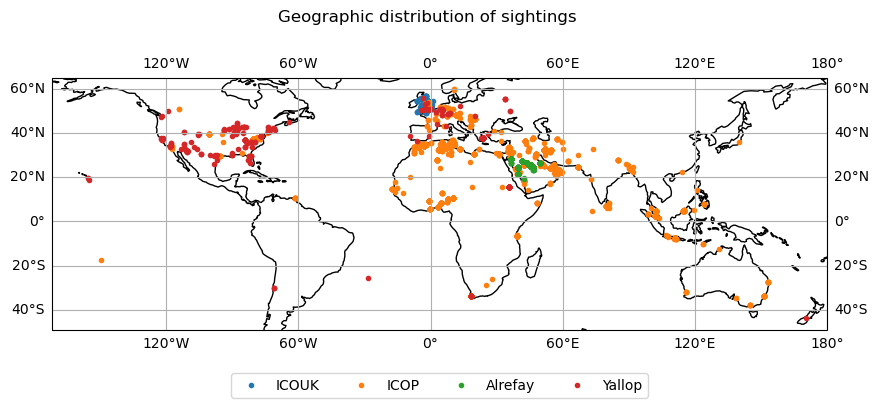

In [18]:
x = data["Longitude"]
y= data["Latitude"]
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for source, name in zip(sources,source_names):
    x = source["Longitude"]
    y = source["Latitude"]
    ax.plot(x,y,".",label=name)

fig.suptitle("Geographic distribution of sightings")
fig.legend(loc="lower center",ncol=4)
plt.show()

## Visibility

In [19]:
def plot_pie_distribution(column, title,labels=[]):

    fig = plt.figure(figsize=(14,3))

    pies = data[column].value_counts(sort=False)
    if len(labels) == 0:
        labels = data[column].unique()
    ax1 = fig.add_subplot(1,5,1)
    ax1.pie(pies, labels=labels, autopct='%1.0f%%')
    ax1.set_title("All sources")
    ax1.set_xlabel(f"N={data.shape[0]}")

    for i, source in enumerate(sources):
        pies = source[column].value_counts(sort=False)
        labels = source[column].unique()
        ax = fig.add_subplot(1,5,i+2)
        ax.pie(pies,labels=labels,autopct='%1.0f%%')
        ax.set_title(source_names[i])
        ax.set_xlabel(f"N={source.shape[0]}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

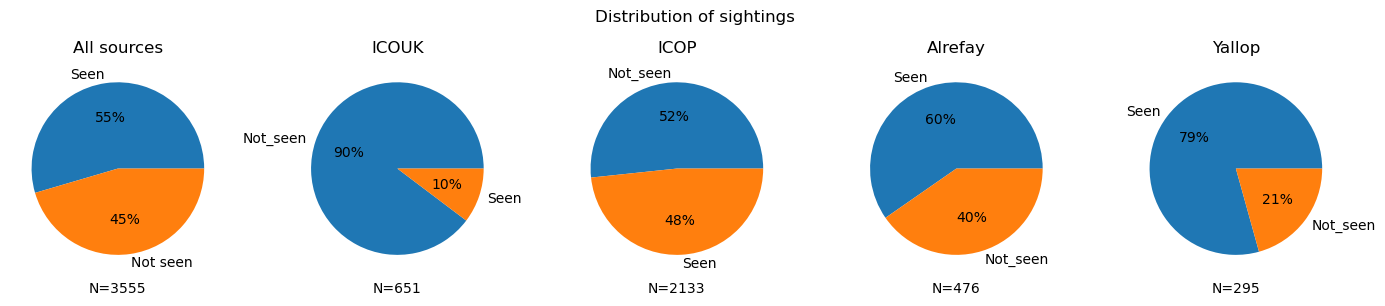

In [20]:
seen_labels=["Seen", "Not seen"]
plot_pie_distribution("Seen", "Distribution of sightings",seen_labels)

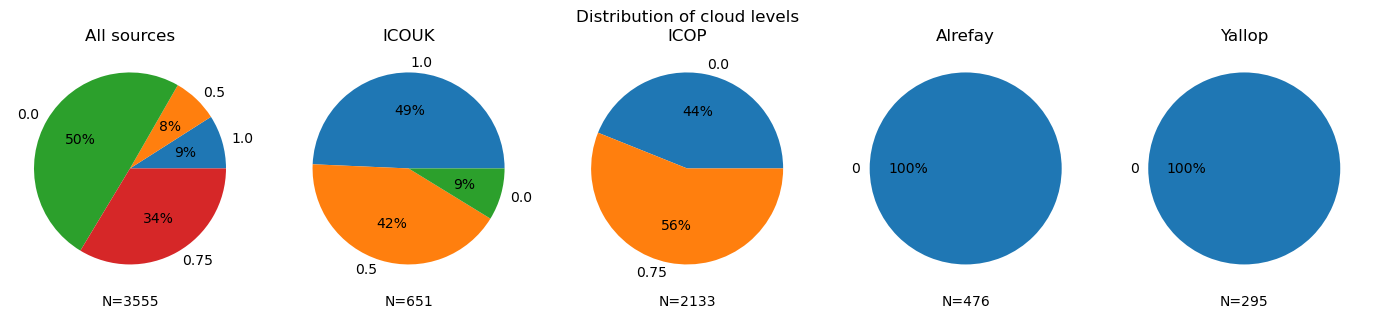

In [21]:
plot_pie_distribution("Cloud Level", "Distribution of cloud levels")

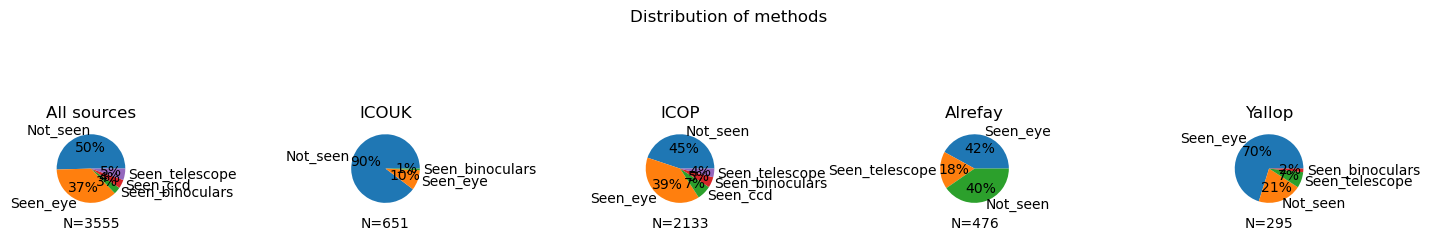

In [22]:
plot_pie_distribution("Method", "Distribution of methods")

c:\ProgramData\miniconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


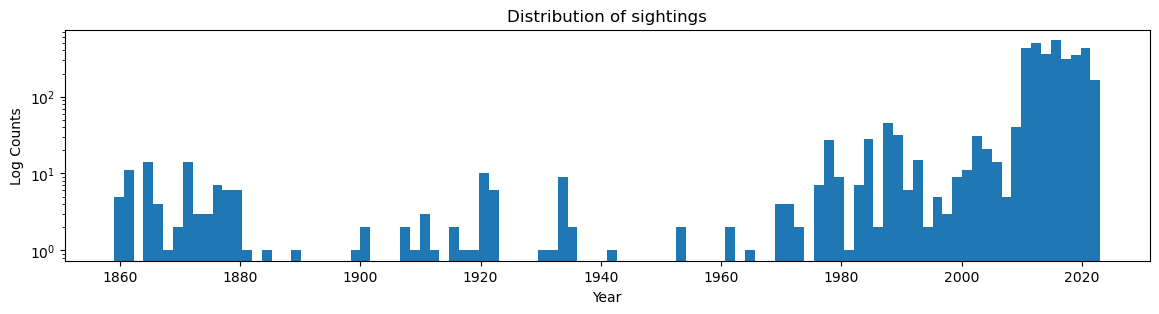

In [23]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

ax.hist(dates_list,log=True,bins=100)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
plt.show()

<Figure size 640x480 with 0 Axes>

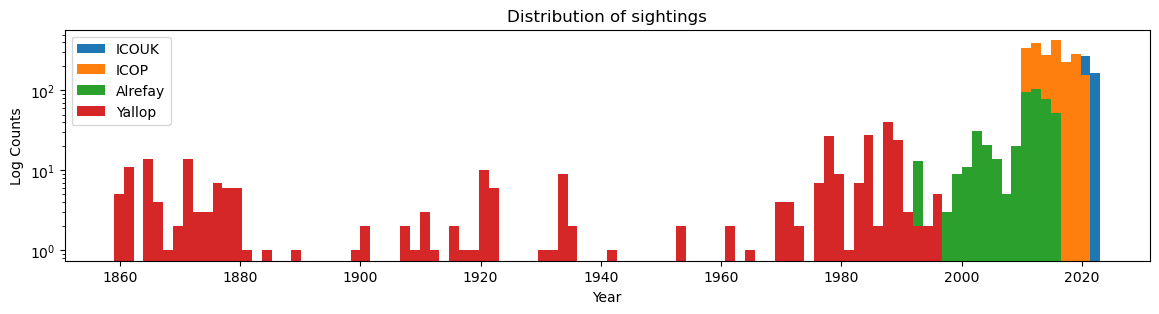

In [24]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]
#print(dates_list[1].timestamp())

(n, bins, patches) = plt.hist(dates_list, bins=100)
plt.clf()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in source["Date"]]
    ax.hist(dates_list,bins,log=True,label=name)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
ax.legend()
plt.show()

## Accuracy of Yallop

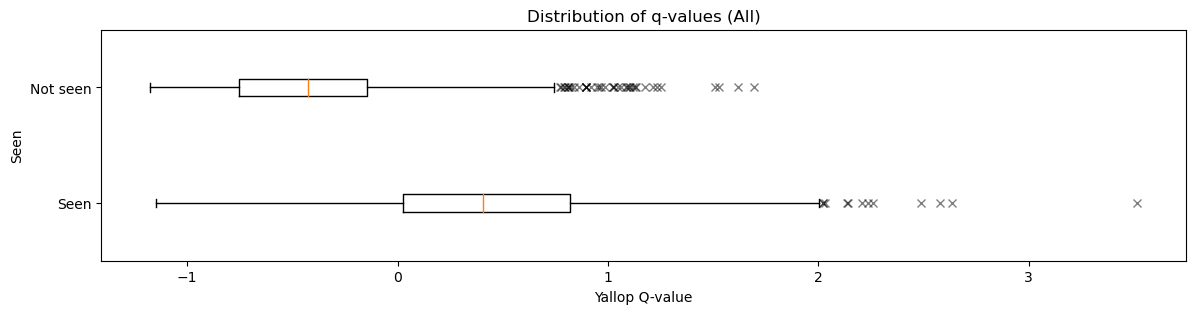

In [25]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

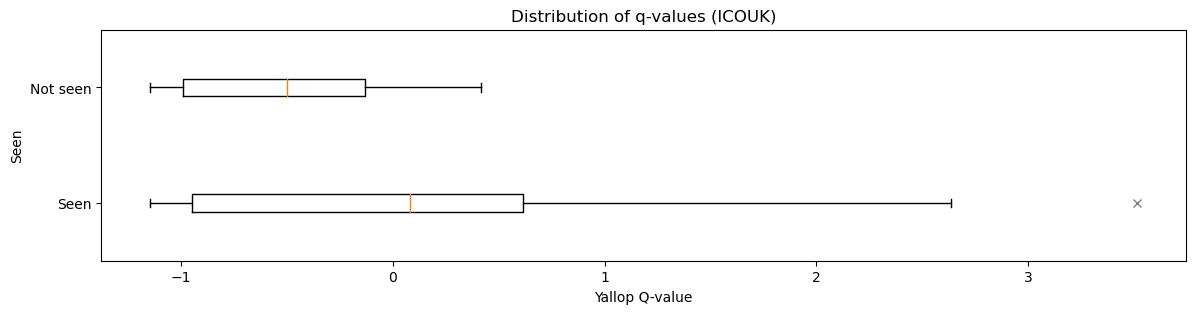

In [26]:
data_to_check = yallop_data
seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Seen"]
not_seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (ICOUK)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

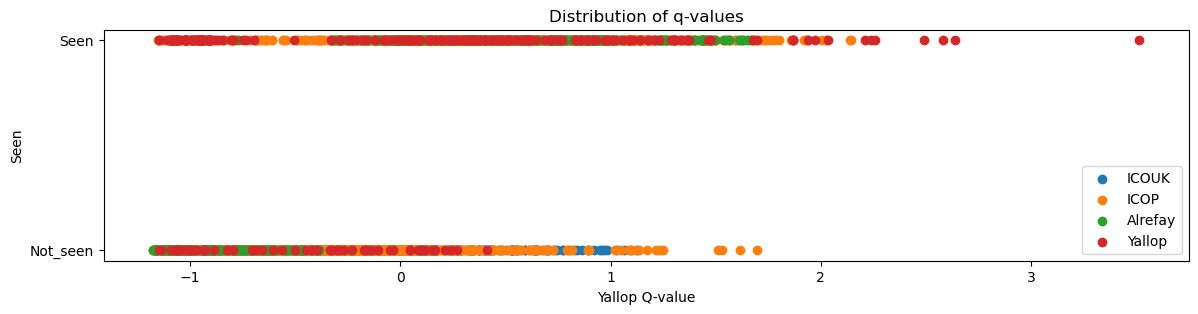

In [27]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    ax.scatter(source["q'"],source["Seen"],label=name)

ax.set_title("Distribution of q-values")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.legend()
plt.show()

In [28]:
below_danjon_data = data[np.logical_and(data["Seen"]=="Seen",-0.293>=data["q'"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below q=-0.293 (Danjon limit): {below_danjon_data.shape[0]}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source['Seen']=='Seen', -0.293>=source["q'"])].shape[0]
    print(f"{name}: {no_below_danjon}")

#interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
interesting_data = yallop_data[np.logical_and(yallop_data["Seen"]=="Seen",-0.293>=yallop_data["q'"])]
interesting_data = interesting_data.drop(["Methods","Visibility","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()
interesting_data.head(20)

182
Total: 3555. Below q=-0.293 (Danjon limit): 182
ICOUK: 0
ICOP: 80
Alrefay: 5
Yallop: 97


c:\ProgramData\miniconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 7 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,ARCL,ARCV,DAZ,Parallax,W',q',Seen,Method,Source
53,53,1961-01-17 01:12:57.887982,34.0,-118.3,0.104,1961-01-17 01:08:03.263992,1961-01-17 01:19:06.816015,11.06667,3.03768,2.32384,-1.95658,61.47202,0.02354,-0.93649,Seen,Seen_eye,YALLOP
77,77,1982-04-24 00:16:37.919995,37.2,-84.1,0.147,1982-04-24 00:18:20.736013,1982-04-24 00:14:30.047987,-3.85000,5.20256,0.46029,5.18260,60.02906,0.06736,-1.09542,Seen,Seen_eye,YALLOP
78,78,1990-04-25 13:17:04.128006,37.7,-121.5,29.175,1990-04-25 13:17:44.735994,1990-04-25 13:16:14.015987,-1.51667,7.11071,0.54092,7.09064,61.32843,0.12849,-1.04956,Seen,Seen_eye,YALLOP
88,88,1989-04-06 12:51:45.215988,34.0,-107.2,29.237,1989-04-06 12:49:20.928015,1989-04-06 12:54:45.791995,5.41667,6.78404,0.81903,6.73504,61.28628,0.11687,-1.02890,Seen,Seen_eye,YALLOP
100,100,1976-12-21 15:31:16.608007,37.6,-122.5,29.368,1976-12-21 15:21:29.952005,1976-12-21 15:43:29.279993,21.98333,9.28604,3.54874,8.58372,60.03224,0.21416,-0.69669,Seen,Seen_eye,YALLOP
103,103,1973-03-05 12:07:19.776009,40.0,-85.0,29.609,1973-03-05 12:07:24.096002,1973-03-05 12:07:13.728004,-0.16667,7.73327,0.29959,7.72805,57.98931,0.14367,-1.06440,Seen,Seen_eye,YALLOP
108,108,1954-03-05 12:21:27.359986,44.5,-88.0,29.337,1954-03-05 12:23:02.399985,1954-03-05 12:19:29.856016,-3.53333,6.64338,0.89008,6.58404,60.85859,0.11132,-1.02521,Seen,Seen_eye,YALLOP
109,109,1971-04-25 10:59:34.655995,39.5,-88.2,29.192,1971-04-25 11:02:15.360011,1971-04-25 10:56:14.207997,-6.01667,6.07025,1.33110,5.92304,60.45366,0.09235,-0.99283,Seen,Seen_eye,YALLOP
113,113,1970-04-06 13:35:59.424001,48.0,-122.0,29.262,1970-04-06 13:36:40.895995,1970-04-06 13:35:07.584009,-1.55000,6.02446,0.51693,6.00270,59.07494,0.08888,-1.07639,Seen,Seen_eye,YALLOP
117,117,1987-04-28 13:22:22.944020,37.0,-122.0,29.468,1987-04-28 13:17:34.367995,1987-04-28 13:28:24.960001,10.85000,6.62709,1.73056,6.39799,56.02290,0.10194,-0.94695,Seen,Seen_eye,YALLOP


In [31]:
below_danjon_data = data[np.logical_and(data["Method"]=="Seen_eye",-0.293>=data["q'"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below q=-0.293 (Danjon limit) for eye: {below_danjon_data.shape[0]}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source["Method"]=="Seen_eye", -0.293>=source["q'"])].shape[0]
    print(f"{name}: {no_below_danjon}")

107
Total: 3555. Below q=-0.293 (Danjon limit) for eye: 107
ICOUK: 0
ICOP: 29
Alrefay: 0
Yallop: 78


In [ ]:
morning_data = data[data["Moon Age"]>20]
evening_data = data[data["Moon Age"]<=20]

print(f"Total: {data.shape[0]} Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[source["Moon Age"]>20].shape[0]
    sevening_data = source[source["Moon Age"]<=20].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

#interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
interesting_data = yallop_data[yallop_data["Moon Age"]>20]
interesting_data = interesting_data.drop(["Methods","Visibility","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()
interesting_data.head(20)

Total: 3555 Morning: 355 Evening: 3200
ICOUK: Morning: 0 Evening: 651
ICOP: Morning: 37 Evening: 2096
Alrefay: Morning: 170 Evening: 306
Yallop: Morning: 148 Evening: 147


/raid/scratch/npower/miniconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 22 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,ARCL,ARCV,DAZ,Parallax,W',q',Seen,Method,Source
0,0,1870-07-25 02:04:22.368013,38.0,23.7,26.019,1870-07-25 03:20:56.255990,1870-07-25 00:28:41.087989,-172.25000,39.67781,30.18934,-26.06228,53.08969,3.34655,3.51297,Seen,Seen_eye,YALLOP
2,2,1872-09-30 03:13:55.488005,38.0,23.7,26.963,1872-09-30 04:19:16.320007,1872-09-30 01:52:14.016019,-147.03333,28.39697,28.29463,-2.43370,53.05908,1.74614,2.58081,Seen,Seen_eye,YALLOP
3,3,1879-12-11 04:26:16.223986,38.0,23.7,26.974,1879-12-11 05:30:15.840013,1879-12-11 03:06:16.704012,-143.98333,31.69781,24.20092,-20.62621,59.63689,2.43227,2.48770,Seen,Seen_eye,YALLOP
39,39,1880-01-10 05:03:03.744018,38.0,23.7,27.539,1880-01-10 05:40:57.791993,1880-01-10 04:15:40.320012,-85.30000,23.20412,14.24474,-18.36576,60.16052,1.32852,0.97543,Seen,Seen_eye,YALLOP
43,43,1933-09-18 04:24:31.679994,48.6,7.7,27.759,1933-09-18 05:08:51.072007,1933-09-18 03:29:07.871992,-99.71667,18.52250,16.12442,-9.14544,56.05464,0.79291,0.88912,Seen,Seen_eye,YALLOP
62,62,1989-04-04 11:08:06.143987,41.9,-88.7,27.237,1989-04-04 11:32:24.575988,1989-04-04 10:37:43.103986,-54.70000,23.51583,10.24984,-21.19291,60.85974,1.37918,0.60076,Seen,Seen_eye,YALLOP
78,78,1990-04-25 13:17:04.128006,37.7,-121.5,29.175,1990-04-25 13:17:44.735994,1990-04-25 13:16:14.015987,-1.51667,7.11071,0.54092,7.09064,61.32843,0.12849,-1.04956,Seen,Seen_eye,YALLOP
86,86,1991-09-07 05:05:32.351983,50.4,-4.4,27.897,1991-09-07 05:40:06.816007,1991-09-07 04:22:20.352000,-77.78333,16.38328,11.99815,-11.17651,59.61194,0.66062,0.40478,Seen,Seen_eye,YALLOP
88,88,1989-04-06 12:51:45.215988,34.0,-107.2,29.237,1989-04-06 12:49:20.928015,1989-04-06 12:54:45.791995,5.41667,6.78404,0.81903,6.73504,61.28628,0.11687,-1.02890,Seen,Seen_eye,YALLOP
92,92,1990-05-23 11:52:55.775988,31.6,-110.5,27.814,1990-05-23 12:20:56.255990,1990-05-23 11:17:56.256014,-63.00000,14.23042,12.20283,-7.33481,60.95653,0.51056,0.34165,Seen,Seen_eye,YALLOP


In [ ]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/Not_seen): 79.0%


In [ ]:
q_values = data["q'"].astype("float")
quantified_q = np.empty((q_values.size),dtype=str)

data["Method"] = data["Method"].replace("Seen_binoculars", "Aid")
data["Method"] = data["Method"].replace("Seen_telescope", "Aid")
data["Method"] = data["Method"].replace("Seen_ccd", "Aid")

quantified_q[q_values > 0.216] = "Seen" #A Easily visible
quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Aid" #D Will need optical aid to find crescent
quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
print(f"Yallop Accuracy (Seen/With aid/Not_seen): {accuracy_score(data['Seen'].str[0], quantified_q):.1%}")

Yallop Accuracy (Seen/With aid/Not_seen): 75.4%
